# **Task 4 Unsharp Masking /High-boost Filtering**

In [85]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import urllib

In [86]:
def show_image(image, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title), plt.xticks([]), plt.yticks([])
    plt.show()

In [87]:
def plot_images(images, titles, rows, cols , info = -1):
    fig = plt.figure(figsize=(20, 10))
    for i in range(rows * cols):
        ax = fig.add_subplot(rows, cols, i + 1)
        if info != -1:
            ax.text(0.5, 0.5, info[i], fontsize=10, color='black', ha='left', va='top')
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

In [88]:
req = urllib.request.urlopen('https://github.com/AthimetA/FRA321/blob/main/IMGpro/img/Pokemon-Go.jpg?raw=true')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) 

## **Task Start**

In [89]:
kernel_size = 15

### **Blur the image**

#### **Gaussian Blur**

In [90]:
img_guassian = cv2.GaussianBlur(src=img,ksize=(kernel_size,kernel_size),sigmaX=0.0)

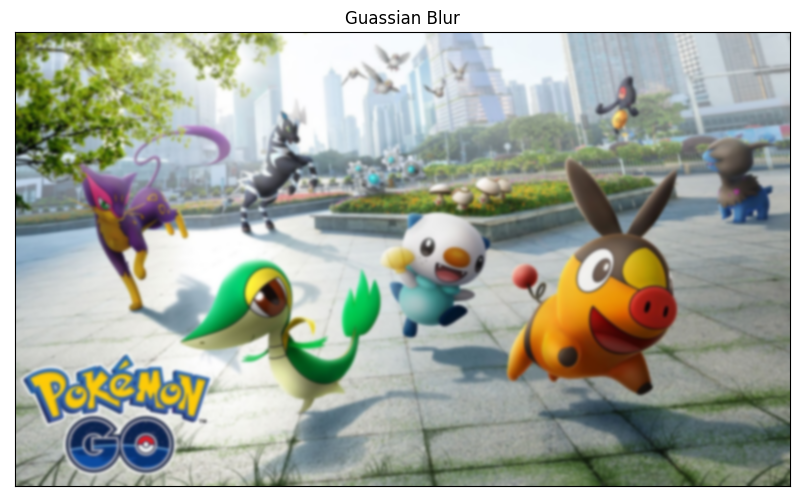

In [91]:
show_image(img_guassian, 'Guassian Blur')

#### **Averaging Filter**

In [92]:
img_Averaging= cv2.blur(src=img,ksize=(kernel_size,kernel_size))

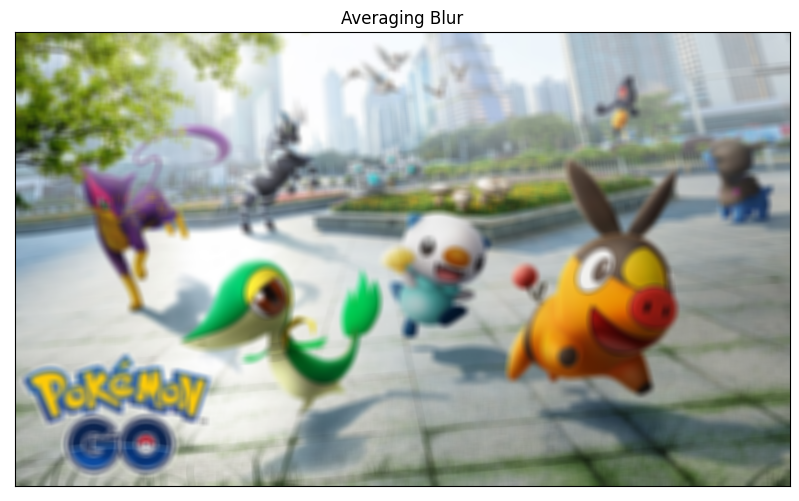

In [93]:
show_image(img_Averaging, 'Averaging Blur')

### **Subtract the blurred image from the original image**

สร้างภาพ Blur ด้วย Gaussian Blur และ Averaging Filter เพื่อทดสอบการทำ Unsharp Masking ด้วย filter ที่แตกต่างกัน

In [94]:
mask_guassian = cv2.addWeighted(src1=img,alpha=1,src2=img_guassian,beta=-1,gamma=0)

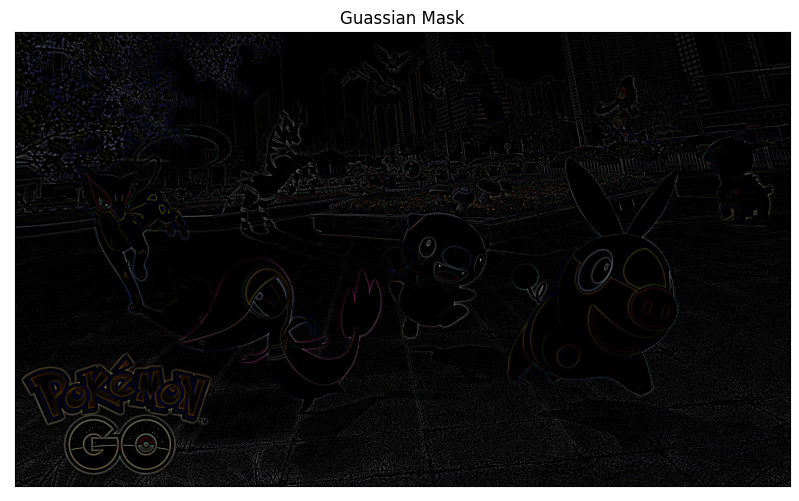

In [95]:
show_image(mask_guassian, 'Guassian Mask')

In [96]:
mask_Averaging = cv2.addWeighted(src1=img,alpha=1,src2=img_Averaging,beta=-1,gamma=0)

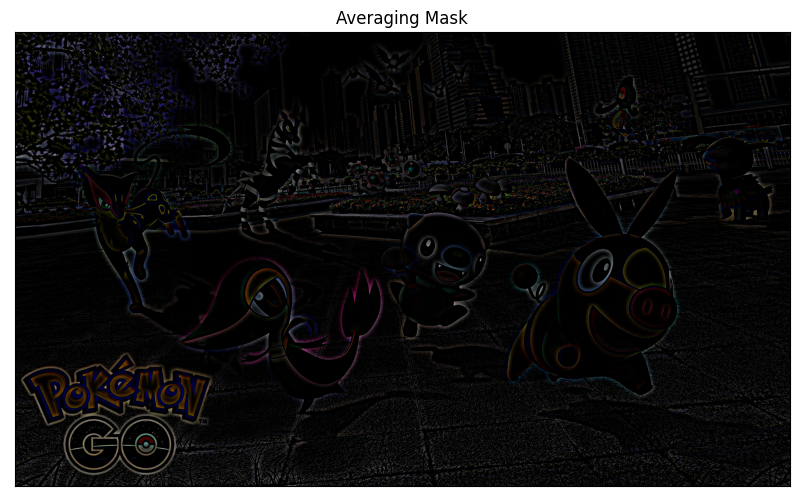

In [97]:
show_image(mask_Averaging, 'Averaging Mask')

### **Add the mask back to the original image**

โดยจะสามารถแสดงได้จากสมการ

g(x,y) = f(x,y) + k(f(x,y) - f'(x,y))

g(x,y) = (f(x,y) + kf(x,y)) - kf'(x,y))

หรือก็คือ

g(x,y) = img + k*(img) - k*(img_blur)

#### **Unsharp Masking**

In [98]:
k = 1.0

In [99]:
img_sharpened_guassian = cv2.addWeighted(src1=img,alpha=1.0 + k ,src2=img_guassian,beta=-k,gamma=0.0)

In [100]:
img_sharpened_Averaging = cv2.addWeighted(src1=img,alpha=1.0 + k,src2=img_Averaging,beta=-k,gamma=0.0)

#### **High-boost Filtering**

โดยจะกำหนด k ที่ใช้ในการคูณกับ mask ให้เป็น 5.0 เพื่อให้ได้ผลลัพธ์ที่มีความแตกต่างกับภาพต้นฉบับมากขึ้น

In [101]:
kh = 5.0

In [102]:
img_highboost_guassian = cv2.addWeighted(src1=img,alpha=1.0 + kh ,src2=img_guassian,beta=-kh,gamma=0.0)

In [103]:
img_highboost_Averaging = cv2.addWeighted(src1=img,alpha=1.0 + kh,src2=img_Averaging,beta=-kh,gamma=0.0)

### **Display the result**

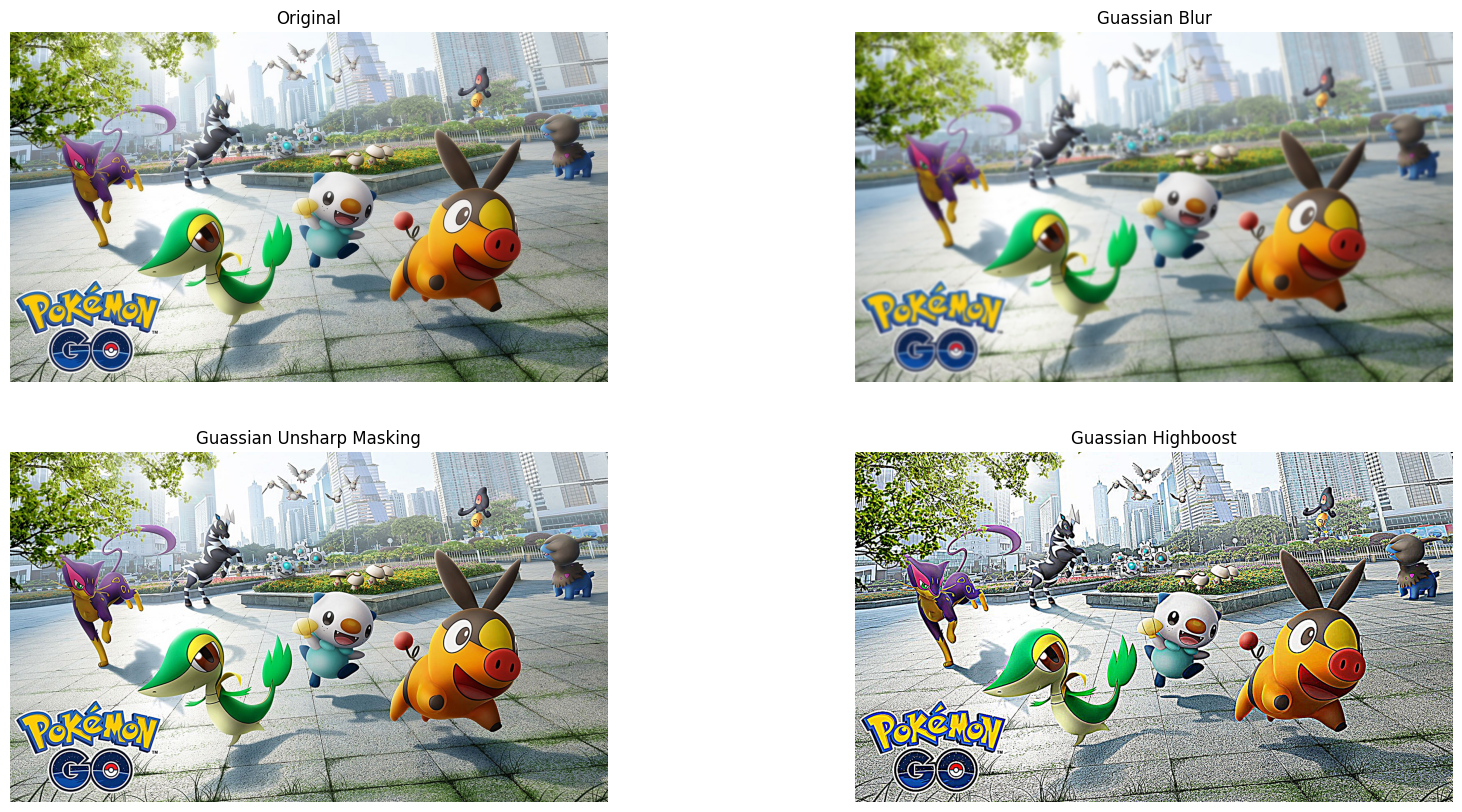

In [104]:
plot_images([img, img_guassian,img_sharpened_guassian,img_highboost_guassian], ['Original','Guassian Blur','Guassian Unsharp Masking','Guassian Highboost'], 2, 2)

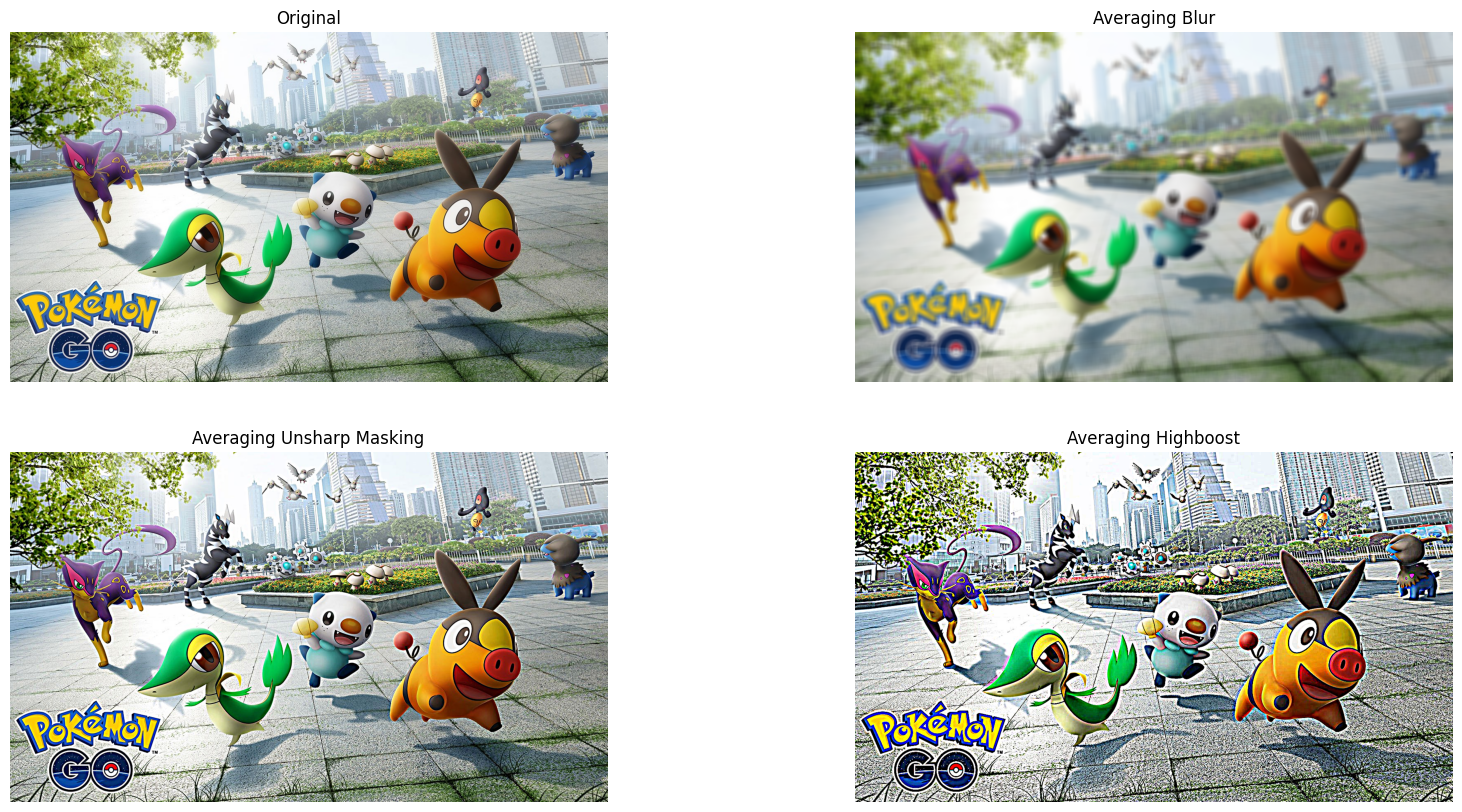

In [105]:
plot_images([img, img_Averaging,img_sharpened_Averaging,img_highboost_Averaging], ['Original','Averaging Blur','Averaging Unsharp Masking','Averaging Highboost'], 2, 2)

## **Conclusion**

จากการลองทำ Unsharp Masking และ High-boost Filtering จะเห็นว่าหลังจากการทำ Unsharp Masking จะทำให้ภาพมีขอบที่คมชัดมากขึ้นกว่าภาพต้นฉบับและ High-boost Filtering จะทำให้ภาพมีขอบที่ยิงคมชัดมากกว่า ซึ่งเป็นไปตามทฤษฎีที่เราได้เรียนมา โดยการใช้ Gaussian Filter หรือ Averaging Filter ในการทำ Blur ให้ผลลัพท์ที่ค้อนข้างคล้ายกันในการทำ Unsharp Masking แต่ในการทำ High-boost Filtering Gaussian Filter จะทำให้ผลลัพท์ที่ดีกว่า Averaging Filter (ในมุมมองของผม)